In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# load local data here

In [117]:
column_names=["Date", "Time", "Open", "High", "Low", "Close", "Volume"]

files = [file for file in os.listdir('./data/XAUUSD/')]
files

['DAT_MT_XAUUSD_M1_2009.csv',
 'DAT_MT_XAUUSD_M1_2010.csv',
 'DAT_MT_XAUUSD_M1_2011.csv',
 'DAT_MT_XAUUSD_M1_2012.csv',
 'DAT_MT_XAUUSD_M1_2013.csv',
 'DAT_MT_XAUUSD_M1_2014.csv',
 'DAT_MT_XAUUSD_M1_2015.csv',
 'DAT_MT_XAUUSD_M1_2016.csv',
 'DAT_MT_XAUUSD_M1_2017.csv',
 'DAT_MT_XAUUSD_M1_2018.csv',
 'DAT_MT_XAUUSD_M1_2019.csv',
 'DAT_MT_XAUUSD_M1_2020.csv',
 'DAT_MT_XAUUSD_M1_2021.csv',
 'DAT_MT_XAUUSD_M1_2022.csv']

# Loop throught all the data files and merge them into one CSV file

In [118]:
data = pd.DataFrame() # initialize empty dataframe

# loop through the files located inside the data/XAUUSD folder
for file in files:
#     print(file)
    df = pd.read_csv("./data/XAUUSD/"+file, names=column_names)
    data = pd.concat([data, df])

data.to_csv("all_data.csv", index=False) # save dataframe to CSV file

In [119]:
data = pd.read_csv("./all_data.csv") # read data from newly created CSV file
data

,Date,Time,Open,High,Low,Close,Volume
0,2009.03.15,17:00,929.600,929.600,929.600,929.600,0
1,2009.03.15,18:00,925.850,927.000,925.800,926.050,0
2,2009.03.15,18:01,925.800,927.300,925.800,925.900,0
3,2009.03.15,18:02,925.900,926.450,925.900,925.900,0
4,2009.03.15,18:03,925.850,926.950,925.850,926.950,0
...,...,...,...,...,...,...,...
4862461,2022.12.30,16:53,1824.378,1824.478,1824.348,1824.348,0
4862462,2022.12.30,16:54,1824.248,1824.348,1824.148,1824.248,0
4862463,2022.12.30,16:55,1824.148,1824.148,1823.737,1823.948,0
4862464,2022.12.30,16:56,1823.948,1824.090,1823.347,1823.848,0


# Filter dataframe to produce only daily data from existing data

In [120]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y.%m.%d') # format and convert the Date column into datetime object
data = data.drop_duplicates(subset='Date') # select daily data by selecting the first occurence of rows of the date column
data

,Date,Time,Open,High,Low,Close,Volume
0,2009-03-15,17:00,929.600,929.600,929.600,929.600,0
333,2009-03-16,00:00,926.700,926.700,926.380,926.550,0
1673,2009-03-17,00:00,922.130,922.130,922.080,922.080,0
3023,2009-03-18,00:00,912.750,912.750,912.150,912.150,0
4410,2009-03-19,00:00,929.630,929.780,929.630,929.780,0
...,...,...,...,...,...,...,...
4856953,2022-12-26,18:00,1800.047,1800.267,1799.687,1799.687,0
4857312,2022-12-27,00:00,1804.895,1804.937,1804.715,1804.795,0
4858689,2022-12-28,00:00,1811.635,1811.748,1810.988,1811.368,0
4860068,2022-12-29,00:00,1808.775,1808.825,1808.558,1808.595,0


In [121]:
data = data.set_index(['Date']) # use the date column as the index
data

,Time,Open,High,Low,Close,Volume
Date,,,,,,
2009-03-15,17:00,929.600,929.600,929.600,929.600,0
2009-03-16,00:00,926.700,926.700,926.380,926.550,0
2009-03-17,00:00,922.130,922.130,922.080,922.080,0
2009-03-18,00:00,912.750,912.750,912.150,912.150,0
2009-03-19,00:00,929.630,929.780,929.630,929.780,0
...,...,...,...,...,...,...
2022-12-26,18:00,1800.047,1800.267,1799.687,1799.687,0
2022-12-27,00:00,1804.895,1804.937,1804.715,1804.795,0
2022-12-28,00:00,1811.635,1811.748,1810.988,1811.368,0


In [122]:
df = df.iloc[::-1] # This reverses the order of the dataframe rows

In [123]:
data = data.drop(['Time','Volume'], axis='columns') # drop irrelevant columns
data

,Open,High,Low,Close
Date,,,,
2009-03-15,929.600,929.600,929.600,929.600
2009-03-16,926.700,926.700,926.380,926.550
2009-03-17,922.130,922.130,922.080,922.080
2009-03-18,912.750,912.750,912.150,912.150
2009-03-19,929.630,929.780,929.630,929.780
...,...,...,...,...
2022-12-26,1800.047,1800.267,1799.687,1799.687
2022-12-27,1804.895,1804.937,1804.715,1804.795
2022-12-28,1811.635,1811.748,1810.988,1811.368


# Function to plot graphs

In [124]:
def plot_graph(figsize, values, column_name):
  plt.figure()
  values.plot(figsize = figsize)
  plt.xlabel("years")
  plt.ylabel(column_name)
  plt.title(f"{column_name} of Gold data")

In [125]:
data.columns # list column names

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

# Loop to plot graphs using the plot_graph function

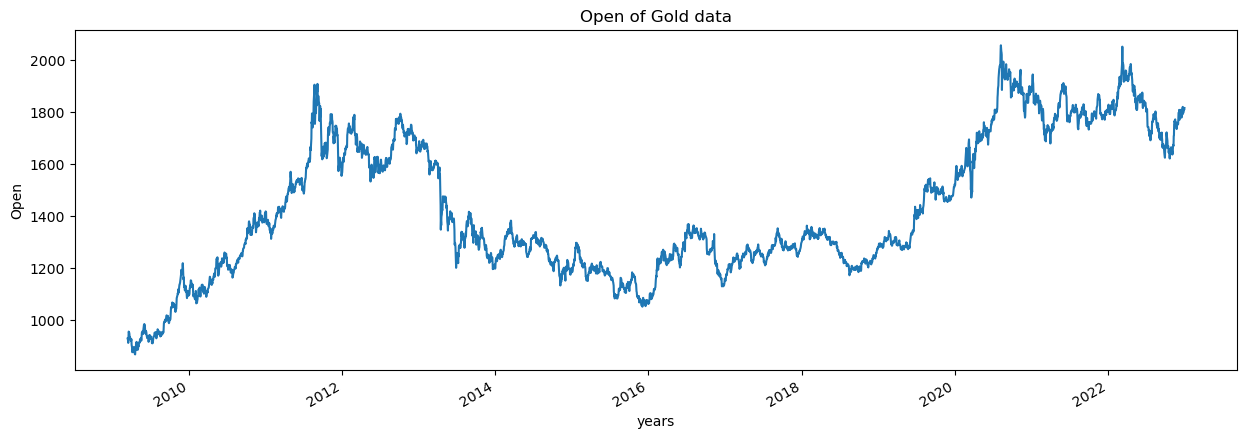

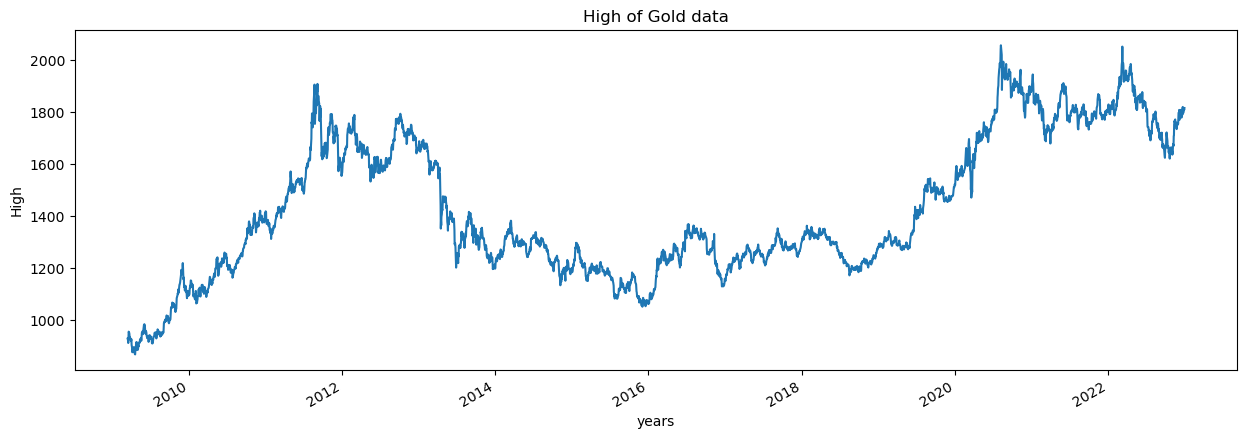

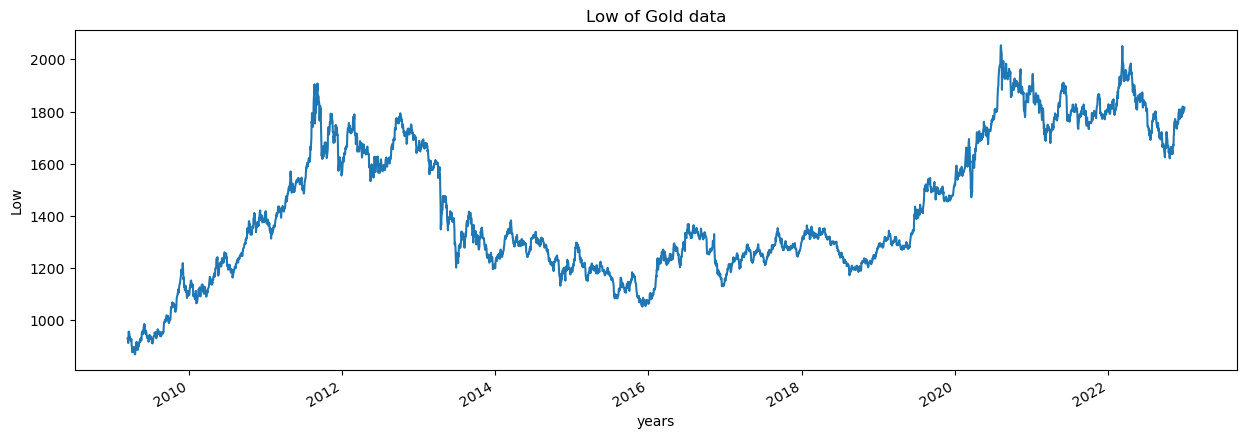

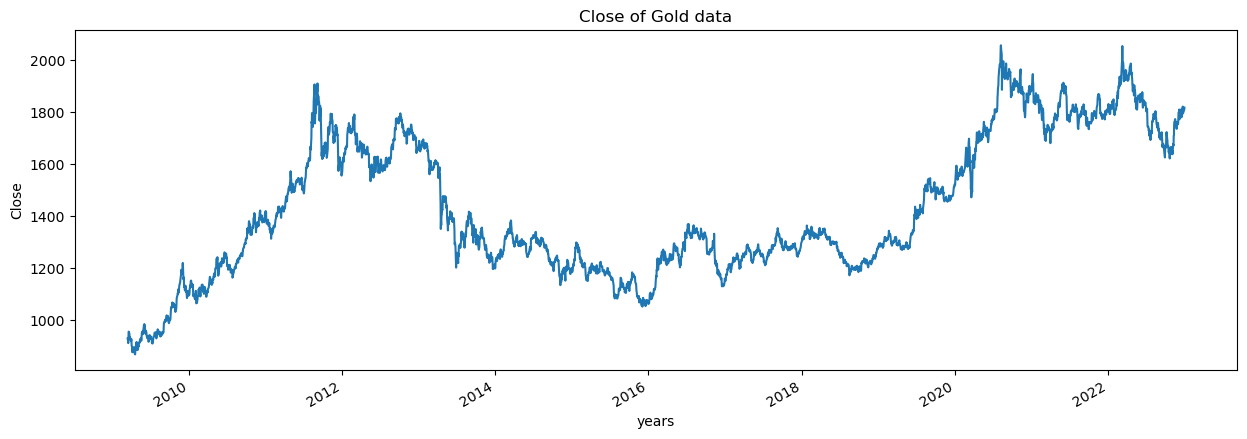

In [126]:
for column in data.columns:
  plot_graph((15,5), data[column], column)

In [127]:
data['ma_100_days'] = data.Close.rolling(100).mean() # 100 days moving average
data['ma_100_days'][0:100].tail()

Date
2009-07-03         NaN
2009-07-05         NaN
2009-07-06         NaN
2009-07-07         NaN
2009-07-08    924.6392
Name: ma_100_days, dtype: float64

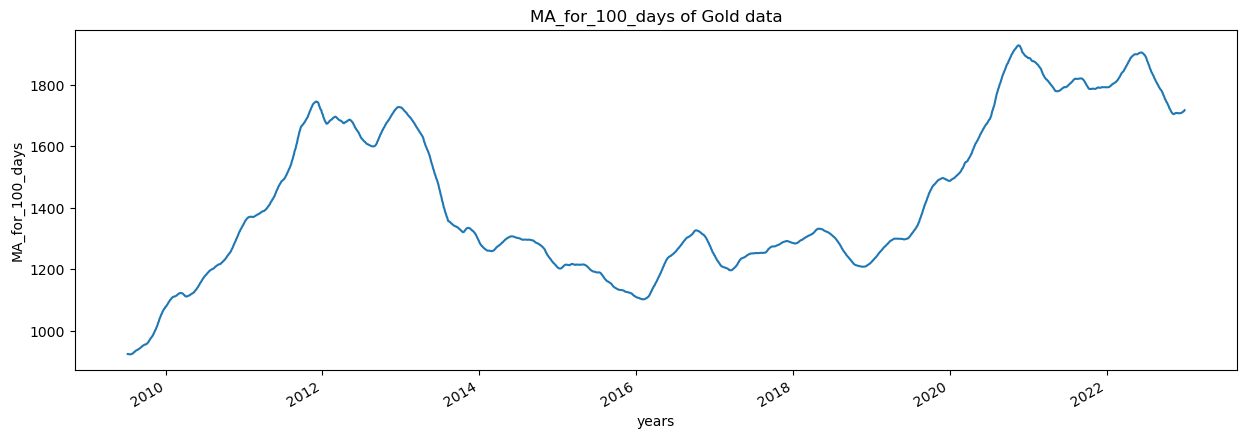

In [128]:

ma_100_days = data['ma_100_days']
plot_graph((15,5), ma_100_days, 'MA_for_100_days')

In [129]:
# plt.figure(figsize=(15,6))
# plt.plot(ma_100_days, 'r')
# plt.plot(data.Close, 'g')
# plt.show()

In [130]:
# plot_graph((15,5), data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

In [131]:
data['ma_250_days'] = data.Close.rolling(250).mean() # 250 days moving average
ma_250_days = data['ma_250_days']

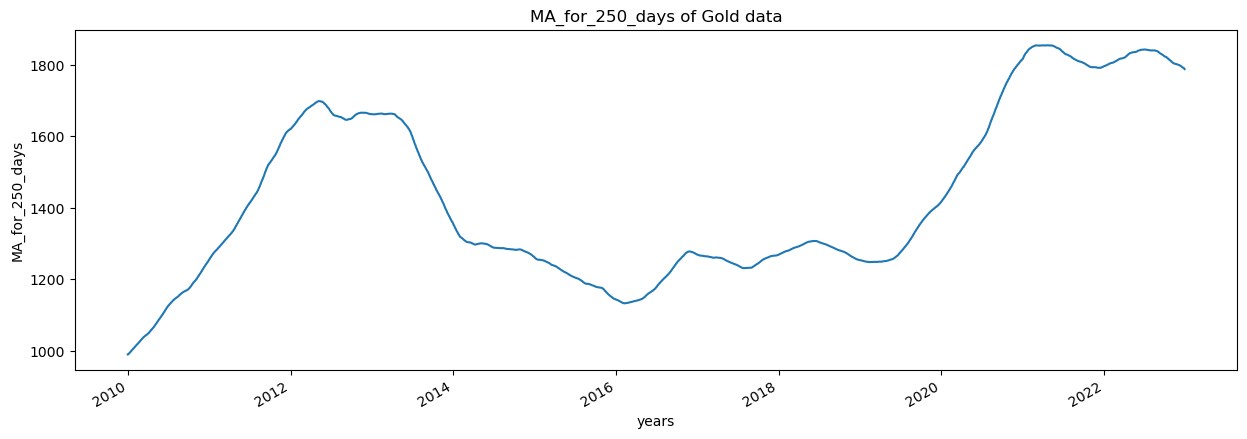

In [132]:
plot_graph((15,5), ma_250_days, 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

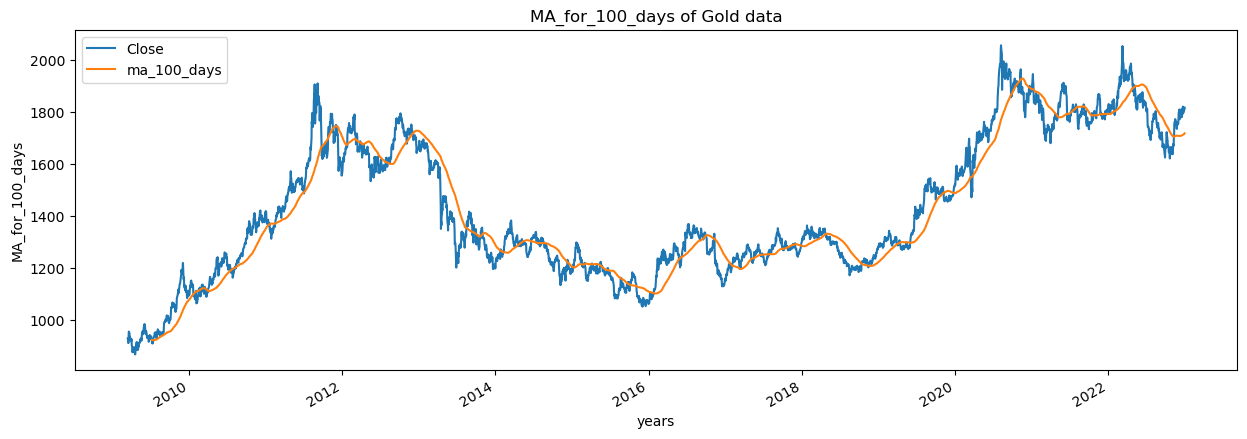

In [133]:
plot_graph((15,5), data[['Close','ma_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

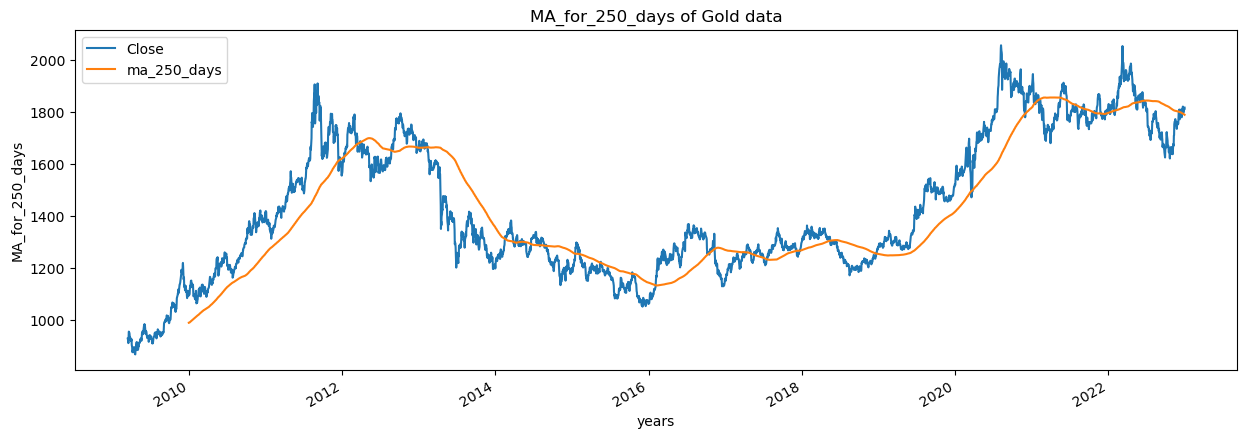

In [134]:
plot_graph((15,5), data[['Close','ma_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

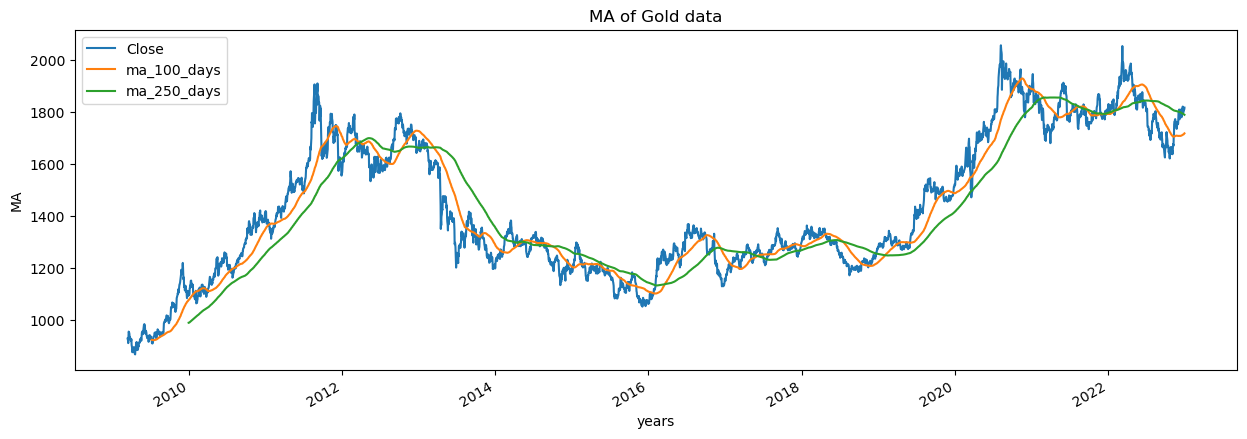

In [135]:
plot_graph((15,5), data[['Close','ma_100_days', 'ma_250_days']], 'MA')

In [136]:
data['percentage_change_cp'] = data['Close'].pct_change() # this creates a new column with the name 'percentage_change_cp' with values coming from the percentage changes on the Close column
data[['Close', 'percentage_change_cp']]

,Close,percentage_change_cp
Date,,
2009-03-15,929.600,NaN
2009-03-16,926.550,-0.003281
2009-03-17,922.080,-0.004824
2009-03-18,912.150,-0.010769
2009-03-19,929.780,0.019328
...,...,...
2022-12-26,1799.687,0.002754
2022-12-27,1804.795,0.002838
2022-12-28,1811.368,0.003642


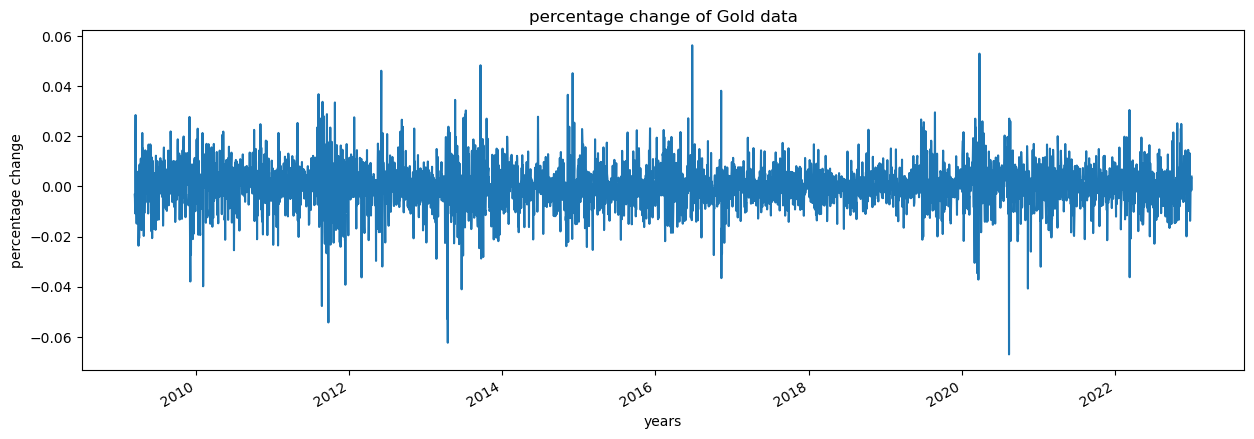

In [137]:
plot_graph((15,5), data['percentage_change_cp'], 'percentage change')

In [138]:
data.dropna(inplace=True) # Data cleaning step to drop null values
data

,Open,High,Low,Close,ma_100_days,ma_250_days,percentage_change_cp
Date,,,,,,,
2009-12-31,1097.880,1097.880,1097.750,1097.800,1078.28100,990.328040,0.003675
2010-01-03,1098.450,1098.600,1098.050,1098.050,1079.33880,991.001840,0.000228
2010-01-04,1101.780,1101.830,1101.430,1101.530,1080.43310,991.701760,0.003169
2010-01-05,1122.730,1122.730,1121.800,1122.250,1081.69080,992.502440,0.018810
2010-01-06,1123.580,1123.900,1123.580,1123.900,1082.93500,993.349440,0.001470
...,...,...,...,...,...,...,...
2022-12-26,1800.047,1800.267,1799.687,1799.687,1712.93501,1791.356608,0.002754
2022-12-27,1804.895,1804.937,1804.715,1804.795,1713.74208,1790.611716,0.002838
2022-12-28,1811.635,1811.748,1810.988,1811.368,1714.81118,1789.649476,0.003642


In [139]:
close_price = data[['Close']] # close price variable from Close column

In [140]:
max(close_price.values),min(close_price.values) # maximum and minimum values from the '

(array([2054.838]), array([1052.18]))

# Data Normalization



In [110]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_price)
scaled_data

array([[0.04549906],
       [0.0457484 ],
       [0.04921918],
       ...,
       [0.75717543],
       [0.75440978],
       [0.76158072]])

In [111]:
len(scaled_data)

4045

In [112]:
x_data = []
y_data = []

# generate x_data and y_data from the scaled_data
for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)


In [113]:
# x, y = np.array(x), np.array(y)
x_data[0],y_data[0]

(array([[0.04549906],
        [0.0457484 ],
        [0.04921918],
        [0.06988425],
        [0.07152987],
        [0.08075535],
        [0.07275661],
        [0.09870764],
        [0.0995853 ],
        [0.09953543],
        [0.07736437],
        [0.08906327],
        [0.08544289],
        [0.07576861],
        [0.08150336],
        [0.08497414],
        [0.08168289],
        [0.06125718],
        [0.03969449],
        [0.04155953],
        [0.04662607],
        [0.04408283],
        [0.04689535],
        [0.03705152],
        [0.03013989],
        [0.02834466],
        [0.02712789],
        [0.05016666],
        [0.06050917],
        [0.05654969],
        [0.012417  ],
        [0.01517965],
        [0.01466103],
        [0.01537912],
        [0.02405606],
        [0.02603081],
        [0.03722107],
        [0.04121046],
        [0.04084144],
        [0.05510353],
        [0.06687225],
        [0.05068528],
        [0.05340804],
        [0.07222802],
        [0.07307576],
        [0

In [114]:
# from keras.layers import Dense, Dropout, LSTM
# from keras.models import Sequential

In [59]:
int(len(x_data)*0.8)

3156

In [60]:
4908-100-int(len(x_data)*0.8)

1652

# Data Splitting into Training and Testing Data

In [61]:
splitting_len = int(len(x_data)*0.8)
x_train = x_data[:splitting_len] # training independent variable
y_train = y_data[:splitting_len] # training dependent variable

x_test = x_data[splitting_len:] # test independent variable
y_test = y_data[splitting_len:] # test depedent variable

In [62]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3156, 100, 1)
(3156, 1)
(789, 100, 1)
(789, 1)


# Model Training

In [63]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [64]:
model = Sequential()
# adding the model layers (you can add as many layers as possible)
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1))) # first layer LSTM
model.add(LSTM(64,return_sequences=False)) # second layer LSTM
model.add(Dense(25)) # 25 neurons
model.add(Dense(1)) # output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [65]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error') # model compilation

In [ ]:
model.fit(x_train,y_train, epochs = 50, batch_size =32, verbose =1) # model training

Epoch 1/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 23s 184ms/step - loss: 0.0257
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 19s 188ms/step - loss: 0.0018
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 21s 193ms/step - loss: 0.0019
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 24s 237ms/step - loss: 0.0012
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 39s 215ms/step - loss: 0.0017
Epoch 6/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 38s 189ms/step - loss: 0.0013
Epoch 7/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 19s 191ms/step - loss: 8.8950e-04
Epoch 8/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 25s 232ms/step - loss: 0.0012
Epoch 9/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 37s 196ms/step - loss: 0.0012
Epoch 10/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 20s 190ms/step - loss: 7.3892e-04
Epoch 11/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 21s 210ms/step - loss: 8.6136e-04
Epoch 12/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 39s 189ms/step - loss: 0.0010
Epoch 13/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 22s 203ms/step - loss: 7.6427e-04
Epoch 14/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 20s 193ms/step - loss: 5.1416e-04
Epoch 15/50
99/99 ━━━━━

In [ ]:
model.summary() # model summary

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [ ]:
predictions = model.predict(x_test) # model prediction

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step


In [ ]:
predictions

array([[0.5621935 ],
       [0.56610805],
       [0.56685513],
       [0.5679363 ],
       [0.57849723],
       [0.57651347],
       [0.5800127 ],
       [0.58420223],
       [0.5841622 ],
       [0.56391686],
       [0.5449561 ],
       [0.5486666 ],
       [0.5437435 ],
       [0.5475562 ],
       [0.5559071 ],
       [0.5454959 ],
       [0.53344256],
       [0.5386905 ],
       [0.5426242 ],
       [0.5571602 ],
       [0.57051533],
       [0.5708851 ],
       [0.5811565 ],
       [0.5812757 ],
       [0.58711016],
       [0.60017335],
       [0.6165955 ],
       [0.6134991 ],
       [0.6239992 ],
       [0.6252462 ],
       [0.6320985 ],
       [0.6214914 ],
       [0.63130164],
       [0.62094104],
       [0.6375337 ],
       [0.6410002 ],
       [0.6419738 ],
       [0.648526  ],
       [0.6426808 ],
       [0.64262605],
       [0.6398269 ],
       [0.6418739 ],
       [0.6468843 ],
       [0.6802551 ],
       [0.68555975],
       [0.6749441 ],
       [0.70195687],
       [0.712

In [ ]:
inv_predictions = scaler.inverse_transform(predictions) # input predictions
inv_predictions

array([[1535.6179],
       [1540.2604],
       [1541.1464],
       [1542.4286],
       [1554.9534],
       [1552.6007],
       [1556.7507],
       [1561.7192],
       [1561.6718],
       [1537.6616],
       [1515.175 ],
       [1519.5756],
       [1513.7369],
       [1518.2587],
       [1528.1624],
       [1515.8152],
       [1501.5204],
       [1507.7443],
       [1512.4094],
       [1529.6486],
       [1545.4872],
       [1545.9258],
       [1558.1072],
       [1558.2485],
       [1565.168 ],
       [1580.6604],
       [1600.1364],
       [1596.4641],
       [1608.9167],
       [1610.3958],
       [1618.5222],
       [1605.9426],
       [1617.5773],
       [1605.29  ],
       [1624.9681],
       [1629.0792],
       [1630.2339],
       [1638.0045],
       [1631.0724],
       [1631.0076],
       [1627.6879],
       [1630.1155],
       [1636.0576],
       [1675.6339],
       [1681.925 ],
       [1669.3353],
       [1701.3713],
       [1714.1406],
       [1780.1064],
       [1769.7216],


In [ ]:
inv_y_test = scaler.inverse_transform(y_test) # output predictions
inv_y_test

array([[1525.13],
       [1526.08],
       [1527.3 ],
       [1539.73],
       [1537.58],
       [1541.63],
       [1546.68],
       [1546.68],
       [1522.98],
       [1500.4 ],
       [1504.73],
       [1498.83],
       [1503.13],
       [1513.03],
       [1500.78],
       [1486.63],
       [1493.13],
       [1497.78],
       [1514.83],
       [1530.53],
       [1531.03],
       [1543.15],
       [1543.53],
       [1550.25],
       [1565.53],
       [1584.73],
       [1581.48],
       [1593.35],
       [1595.25],
       [1602.98],
       [1591.03],
       [1601.68],
       [1590.28],
       [1608.65],
       [1613.48],
       [1614.53],
       [1622.13],
       [1615.83],
       [1615.38],
       [1612.25],
       [1614.38],
       [1620.2 ],
       [1658.45],
       [1666.38],
       [1654.33],
       [1684.28],
       [1698.55],
       [1761.25],
       [1756.43],
       [1794.83],
       [1765.78],
       [1743.5 ],
       [1741.53],
       [1765.05],
       [1784.35],
       [17

In [ ]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2)) # roor mean square error
rmse

25.834060009285096

# plotting data vs original data

In [ ]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2011-06-15,1525.13,1535.617920
2011-06-16,1526.08,1540.260376
2011-06-17,1527.30,1541.146362
2011-06-19,1539.73,1542.428589
2011-06-20,1537.58,1554.953369


<Figure size 640x480 with 0 Axes>

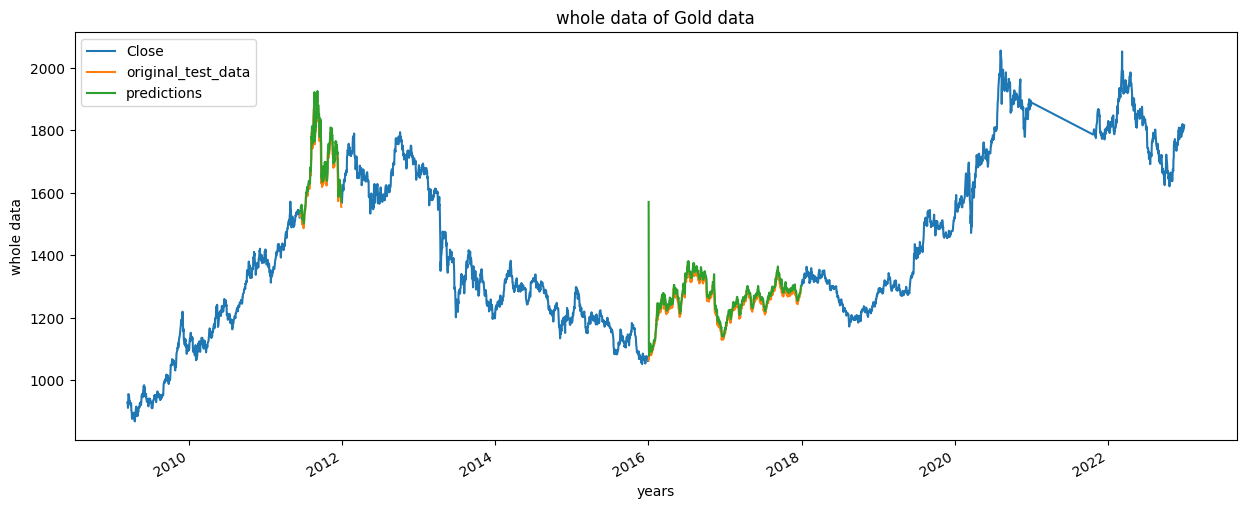

In [ ]:
plot_graph((15,6), pd.concat([close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [ ]:
model.save('Stock_Predictions_Model.keras')